<div>
<img src="https://www.ul.ie/themes/custom/ul/logo.jpg" />
</div>

#**MSc in Artificial Intelligence and Machine Learning**
##CS6271 - Evolutionary Algorithms and Humanoid Robotics 2024
### Kaggle Competition


Module Leader: Conor Ryan

Developer: Allan De Lima

Link to access the competition: https://www.kaggle.com/competitions/cs-6271-2024-5-final-project

Link to join the competition: https://www.kaggle.com/t/017d7291cce043fcb79fb087b6a78437



## Introduction

Predict whether a pacient has diabetes. This is a shorter version of the also known as "Diabetes" dataset.

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

**Class:**

output: 1, 0.


**Listing of features:**

HighBP

HighChol

CholCheck

BMI

Smoker

Stroke

HeartDiseaseorAttack

PhysActivity

Fruits

Veggies

HvyAlcoholConsump

AnyHealthcare

NoDocbcCost

GenHlth

MentHlth

PhysHlth

DiffWalk

Sex

Age

Education

Income

### Load the dataset

In [2]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings("ignore")

In [3]:
## mount your Google drive
# 1) run this cell
# 2) sign in
# 3) verify your drive is mounted

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Clone the GRAPE repository at first because the dataset to be used is already there.

In [4]:
import os
# Get the library from our BDS research Group
# copy the path from your drive
PATH = '/content/drive/MyDrive/grape/'

# check if 'grape' already exists
if os.path.exists(PATH):
    print('grape directory already exists')
else:
    %cd /content/drive/MyDrive/
    !git clone https://github.com/bdsul/grape.git
    print('Cloning grape in your Drive')

# change directory to 'grape'
%cd /content/drive/MyDrive/grape/

grape directory already exists
/content/drive/MyDrive/grape


Now you have a grape folder in your Drive account.

Upload the files training.csv and test.csv from the competition to the folder grape/datasets in your Drive before running the next cells.

### Train set

In [5]:
train_file = 'datasets/training.csv'

In [6]:
# load train set
df_train = pd.read_csv(PATH+train_file)
df_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,7.0,6.0,8.0,0.0
1,1.0,1.0,1.0,35.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,9.0,6.0,8.0,0.0
2,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,0.0,1.0,0.0,13.0,5.0,4.0,0.0
3,0.0,0.0,1.0,24.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,1.0,7.0,4.0,6.0,0.0
4,1.0,0.0,1.0,41.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,3.0,0.0,0.0,0.0,8.0,5.0,7.0,0.0


In [7]:
df_train.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,output
count,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,...,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000,5042.000000
mean,0.513883,0.493653,0.972035,29.447441,0.473225,0.050377,0.133082,0.728877,0.616025,0.801666,...,0.085879,2.702102,3.617017,5.195954,0.207061,0.447441,8.376041,4.958548,5.852836,0.356010
std,0.499857,0.500009,0.164889,7.080019,0.499332,0.218743,0.339697,0.444583,0.486400,0.398785,...,0.280213,1.106379,7.997166,9.538762,0.405240,0.497279,2.920253,1.018217,2.131317,0.478866
min,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000,0.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000,0.000000
75%,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000,1.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,1.000000


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
def scal(data,val):

  X = data.copy()
  # Columns for each scaling method
  standard_cols = ['BMI', 'Age', 'MentHlth', 'PhysHlth','GenHlth', 'Education', 'Income']
  if val == "train":
    scaler.fit(X[standard_cols])
    X[standard_cols] = scaler.transform(X[standard_cols])
  else:
    X[standard_cols] = scaler.transform(X[standard_cols])
  return X




In [9]:
X_train = df_train.copy()
X_train.drop(['output'], axis=1, inplace=True)
y_train = df_train['output'].to_numpy()
X_train = scal(X_train,"train")
print(X_train)

      HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0        0.0       0.0        1.0 -0.345717     0.0     0.0   
1        1.0       1.0        1.0  0.784335     0.0     0.0   
2        1.0       1.0        1.0 -0.769487     0.0     0.0   
3        0.0       0.0        1.0 -0.769487     1.0     0.0   
4        1.0       0.0        1.0  1.631875     0.0     0.0   
...      ...       ...        ...       ...     ...     ...   
5037     1.0       1.0        1.0  0.643079     0.0     0.0   
5038     1.0       1.0        1.0 -0.345717     1.0     0.0   
5039     0.0       0.0        1.0 -1.052000     0.0     0.0   
5040     1.0       1.0        1.0  0.360566     0.0     1.0   
5041     1.0       0.0        1.0 -0.769487     1.0     0.0   

      HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  AnyHealthcare  \
0                      0.0           1.0     1.0      1.0  ...            1.0   
1                      1.0           1.0     1.0      1.0  ...            1.0   


In [10]:
print(y_train[0:5]) #print head

[0. 0. 0. 0. 0.]


### Test set

In [11]:
test_file = 'datasets/test.csv'

In [12]:
# load test set
df_test = pd.read_csv(PATH+test_file)
df_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,4.0,2.0,2.0,1.0,1.0,8.0,4.0,1.0
1,1.0,0.0,1.0,27.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,11.0,6.0,6.0
2,1.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,3.0,0.0,0.0,1.0,12.0,6.0,6.0
3,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,9.0,6.0,3.0
4,1.0,1.0,1.0,32.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,5.0,3.0,6.0,1.0,0.0,10.0,5.0,6.0


In [13]:
df_test.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,...,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000,95804.000000
mean,0.508330,0.484239,0.970628,29.262797,0.461442,0.053839,0.125329,0.724427,0.621352,0.798161,...,0.953353,0.088973,2.701891,3.488654,5.155662,0.219573,0.447841,8.362761,4.977642,5.846739
std,0.499933,0.499754,0.168849,6.972092,0.498514,0.225701,0.331093,0.446805,0.485053,0.401375,...,0.210883,0.284707,1.106275,7.819002,9.550624,0.413960,0.497275,2.959191,1.012794,2.136366
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [14]:
X1_test = df_test.copy()
X1_test = scal(X1_test,"test")
print(X1_test)

       HighBP  HighChol  CholCheck       BMI  Smoker  Stroke  \
0         1.0       1.0        1.0 -0.204461     1.0     0.0   
1         1.0       0.0        1.0 -0.345717     1.0     0.0   
2         1.0       1.0        1.0 -0.345717     0.0     0.0   
3         0.0       0.0        1.0 -0.345717     0.0     0.0   
4         1.0       1.0        1.0  0.360566     1.0     0.0   
...       ...       ...        ...       ...     ...     ...   
95799     1.0       1.0        1.0 -0.628230     0.0     0.0   
95800     1.0       0.0        1.0 -1.193257     1.0     0.0   
95801     0.0       0.0        1.0  1.066848     1.0     0.0   
95802     1.0       1.0        1.0  0.219309     1.0     0.0   
95803     1.0       1.0        1.0 -0.486974     0.0     0.0   

       HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  \
0                       1.0           1.0     0.0      0.0  ...   
1                       1.0           0.0     1.0      1.0  ...   
2                       0.0   

Convert the datasets to NumPy to easily use them.

In [15]:
# data features
X_train = X_train.to_numpy()



In [16]:
f_test = X1_test

## GRAPE

<div>
<img src="https://drive.google.com/uc?export=view&id=1hw43Oi3lGTCkspQ0ged2bZB8q2EpcPhz" width="150"/>
</div>

GRammatical Algorithms in Python for Evolution (GRAPE)


In [17]:
!pip install deap

import grape
import algorithms

from os import path
from deap import creator, base, tools
import random
import csv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 2.3 MB/s eta 0:00:00


You can import functions to be used with your grammar from [functions.py](https://github.com/UL-BDS/grape/blob/main/functions.py) on GRAPE repository and / or you can define your own functions.

In [18]:
from functions import add, sub, mul, pdiv, psqrt, plog, and_, or_, not_, less_than_or_equal, greater_than_or_equal,if_

'heartDisease.bnf' is a grammar used for another problem just to check if everything is working well.

Write your own grammar in a text file and save it in your Drive account.

Put the whole address on GRAMMAR_FILE and print to check it.

In [19]:
#GRAMMAR_FILE = '/content/drive/MyDrive/data/example.bnf' #put the whole address of your own grammar and remove the # in the beginning of this line
GRAMMAR_FILE = 'heartDisease.bnf' #remove this line when you are using your own grammar

#f = open(GRAMMAR_FILE, "r") #remove the # in the beginning of this line when you are using your own grammar
f = open("grammars/" + GRAMMAR_FILE, "r") #remove this line when you are using your own grammar
print(f.read())
f.close()


<log_op> ::= <conditional_branches> | and_(<log_op>,<log_op>) | or_(<log_op>,<log_op>) | not_(<log_op>) | <boolean_feature>
<conditional_branches> ::= less_than_or_equal(<num_op>,<num_op>) | greater_than_or_equal(<num_op>, <num_op>) | if_(<log_op>,<conditional_branches>,<conditional_branches>)
<num_op>   ::= add(<num_op>,<num_op>) | sub(<num_op>,<num_op>) | mul(<num_op>,<num_op>) | pdiv(<num_op>,<num_op>) | <nonboolean_feature>
<boolean_feature> ::= x[0]|x[1]|x[2]|x[4]|x[5]|x[6]|x[7]|x[8]|x[9]|x[10]|x[11]|x[12]|x[16]|x[17]
<nonboolean_feature> ::= x[3]|x[13]|x[14]|x[15]|x[18]|x[19]|x[20]| <constant>
<constant> ::= -2 | -1.5 | -1 | -0.5 | 0 | 0.5 | 1 | 1.5 | 2 | <precise_constant>
<precise_constant> ::= <c><c>.<c><c>
<c> ::= 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9


Run the following cell to put your grammar on the class Grammar.

In [20]:
#BNF_GRAMMAR = grape.Grammar(GRAMMAR_FILE) #remove the # in the beginning of this line when you are using your own grammar
BNF_GRAMMAR = grape.Grammar(path.join("grammars", GRAMMAR_FILE)) #remove this line when you are using your own grammar

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The fitness function here is the percentage of outputs wrongly predicted.

You can write your own fitness function if you prefer.

In [22]:
import numpy as np

def fitness_eval(individual, points):
    x = points[0]
    y = points[1]

    if individual.invalid:
        return 1000,

    try:
        # Evaluate the individual's phenotype to generate predictions
        pred = eval(individual.phenotype)
    except (FloatingPointError, ZeroDivisionError, OverflowError, MemoryError):
        return 1000,

    assert np.isrealobj(pred)

    try:
        # Binary classification with an adjusted threshold
        Y_class = [1 if pred[i] > 0.5 else 0 for i in range(len(y))]
    except (IndexError, TypeError):
        return 1000,

    # Accuracy component: Encourage correct classifications
    accuracy = np.mean(np.equal(y, Y_class))
    accuracy_penalty = 1 - accuracy  # Higher accuracy lowers this component

    fitness = (accuracy_penalty )

    return (fitness,)


To use properly the fitness function above with GRAPE, the features must be in the lines, and the samples must be in the columns, so if your data is not like that, you need to transpose the matrix.

Take a look at the print. If you run this cell two times, the matrix will be transposed again and will not work properly.

In [23]:
X_train = np.transpose(X_train)
#X_test = np.transpose(X_test)

print('Training (X,Y):\t', X_train.shape, y_train.shape)
#print('Test (X):\t', X_test.shape)

Training (X,Y):	 (21, 5042) (5042,)


Set the Grammatical Evolution parameters.

Make sure you set a random seed just in case we need to re-run your experiments.

In [24]:
POPULATION_SIZE = 1000
MAX_GENERATIONS = 250
P_CROSSOVER = 0.9
P_MUTATION = 0.02
ELITE_SIZE = 1
HALL_OF_FAME_SIZE = 3

TOURNAMENT_SIZE = 3
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

CODON_CONSUMPTION = 'lazy'
GENOME_REPRESENTATION = 'list'
MAX_GENOME_LENGTH = None

MAX_INIT_TREE_DEPTH = 12
MIN_INIT_TREE_DEPTH = 3
MAX_TREE_DEPTH = 30
MAX_WRAPS = 0
CODON_SIZE = 255

REPORT_ITEMS = ['gen', 'invalid', 'avg', 'std', 'min', 'max',
                'best_ind_length', 'avg_length',
                'best_ind_nodes', 'avg_nodes',
                'best_ind_depth', 'avg_depth',
                'avg_used_codons', 'best_ind_used_codons',
                'structural_diversity', 'fitness_diversity',
                'selection_time', 'generation_time']

Create a toolbox.

In [25]:
toolbox = base.Toolbox()

# define a single objective, minimising fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

creator.create('Individual', grape.Individual, fitness=creator.FitnessMin)


toolbox.register("populationCreator", grape.sensible_initialisation, creator.Individual)

toolbox.register("evaluate", fitness_eval)

# Tournament selection:
toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)

# Single-point crossover:
toolbox.register("mate", grape.crossover_onepoint)

# Flip-int mutation:
toolbox.register("mutate", grape.mutation_int_flip_per_codon)


In [26]:
# create initial population (generation 0):
population = toolbox.populationCreator(pop_size=POPULATION_SIZE,
                                           bnf_grammar=BNF_GRAMMAR,
                                           min_init_depth=MIN_INIT_TREE_DEPTH,
                                           max_init_depth=MAX_INIT_TREE_DEPTH,
                                           codon_size=CODON_SIZE,
                                           codon_consumption=CODON_CONSUMPTION,
                                           genome_representation=GENOME_REPRESENTATION
                                            )

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", np.nanmean)
stats.register("std", np.nanstd)
stats.register("min", np.nanmin)
stats.register("max", np.nanmax)

Run Grammatical Evolution.

In [27]:
population, logbook = algorithms.ge_eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, elite_size=ELITE_SIZE,
                                              bnf_grammar=BNF_GRAMMAR,
                                              codon_size=CODON_SIZE,
                                              max_tree_depth=MAX_TREE_DEPTH,
                                              max_genome_length=MAX_GENOME_LENGTH,
                                              points_train=[X_train, y_train],
                                              codon_consumption=CODON_CONSUMPTION,
                                              report_items=REPORT_ITEMS,
                                              genome_representation=GENOME_REPRESENTATION,
                                              stats=stats, halloffame=hof, verbose=False)

gen = 0 , Best fitness = (0.3153510511701706,)
gen = 1 , Best fitness = (0.3094010313367711,) , Number of invalids = 239
gen = 2 , Best fitness = (0.3094010313367711,) , Number of invalids = 100
gen = 3 , Best fitness = (0.2943276477588259,) , Number of invalids = 55
gen = 4 , Best fitness = (0.2943276477588259,) , Number of invalids = 40
gen = 5 , Best fitness = (0.2943276477588259,) , Number of invalids = 36
gen = 6 , Best fitness = (0.2943276477588259,) , Number of invalids = 24
gen = 7 , Best fitness = (0.2943276477588259,) , Number of invalids = 35
gen = 8 , Best fitness = (0.2943276477588259,) , Number of invalids = 16
gen = 9 , Best fitness = (0.2943276477588259,) , Number of invalids = 25
gen = 10 , Best fitness = (0.2943276477588259,) , Number of invalids = 33
gen = 11 , Best fitness = (0.2943276477588259,) , Number of invalids = 26
gen = 12 , Best fitness = (0.29155097183657275,) , Number of invalids = 31
gen = 13 , Best fitness = (0.28520428401428,) , Number of invalids = 33

Show the best individual as an expression.

In [28]:
# Best individual
import textwrap
best = hof.items[0].phenotype
print("Best individual: \n","\n".join(textwrap.wrap(best,80)))
print("\nTraining Fitness: ", hof.items[0].fitness.values[0])

Best individual: 
 and_(greater_than_or_equal(x[13],
sub(0,x[3])),and_(or_(greater_than_or_equal(pdiv(x[18],x[3]), pdiv(x[13],-
2)),and_(x[1],x[0])),and_(or_(x[2],x[0]),or_(less_than_or_equal(1,sub(add(pdiv(x
[18],sub(x[13],0)),x[3]),sub(x[3],x[3]))),and_(x[0],x[2])))))

Training Fitness:  0.25366917889726304


In [40]:
def plot_fitness(logbook):
       """Plots the maximum fitness per generation."""
       gen = logbook.select("gen")
       fit_max = logbook.select("min")  # Assuming 'max' stores the maximum fitness

       plt.plot(gen, fit_max, label="Maximum Fitness")
       plt.xlabel("Generation")
       plt.ylabel("Loss")
       plt.title("Loss per generation ")
       plt.legend()
       plt.show()

In [41]:
def plot_accuracy(logbook):
       """Plots the average fitness per generation."""
       gen = logbook.select("gen")
       fit_avg = logbook.select("min")
       fit_avg = [1-i for i in fit_avg]
       plt.plot(gen, fit_avg, label="Average Fitness")
       plt.xlabel("Generation")
       plt.ylabel("Accuracy")
       plt.title("Accuracy Per Generation")
       plt.legend()
       plt.show()

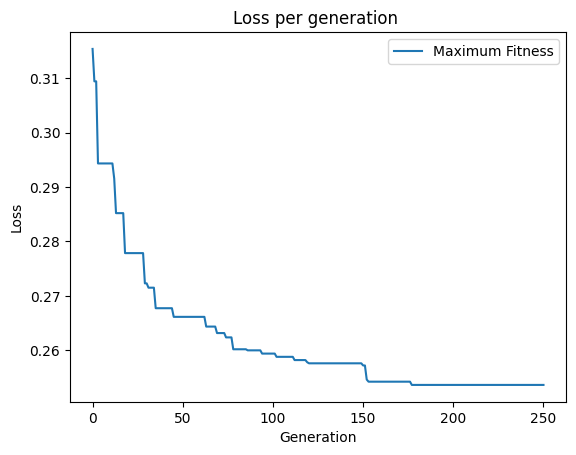

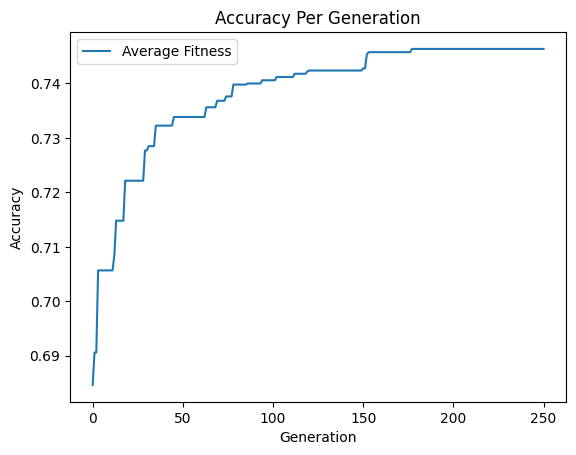

In [42]:
plot_fitness(logbook)
plot_accuracy(logbook)


Define a function to predict values, without comparing to expected outputs.

In [43]:
def predict_train(individual, X , y_test  ):
    x = X

    if individual.invalid == True:
        return np.NaN, # Return NaN if the individual is invalid

    # Evaluate the expression
    try:
      def evaluate_expression(x):
          # Define local variables for the expression context
          X = x
          # Evaluate the expression and handle potential errors
          try:
              pred = eval(individual.phenotype)
          except (TypeError, ValueError, NameError):  # Handle potential errors in expression
              pred = np.nan  # Return NaN for invalid expressions
          return pred  # Explicitly return the prediction

      pred = np.apply_along_axis(evaluate_expression,0,x)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,

    # Replace NaN values with a suitable default (e.g., -1)
    pred = np.nan_to_num(pred, nan=-1).astype(int)

    y_test = y_test.astype(int)
    pred = pred.astype(int)  # This line is now handled above
    acc = accuracy_score(y_test, pred)


    return pred , acc

In [44]:
def predict_test(individual, X  ):
    x = X

    if individual.invalid == True:
        return np.NaN, # Return NaN if the individual is invalid

    # Evaluate the expression
    try:
      def evaluate_expression(x):
          # Define local variables for the expression context
          X = x
          # Evaluate the expression and handle potential errors
          try:
              pred = eval(individual.phenotype)
          except (TypeError, ValueError, NameError):  # Handle potential errors in expression
              pred = np.nan  # Return NaN for invalid expressions
          return pred  # Explicitly return the prediction

      pred = np.apply_along_axis(evaluate_expression,0,x)
    except (FloatingPointError, ZeroDivisionError, OverflowError,
            MemoryError):
        return np.NaN,

    # Replace NaN values with a suitable default (e.g., -1)
    pred = np.nan_to_num(pred, nan=-1).astype(int)

    #y_test = y_test.astype(int)
    pred = pred.astype(int)  # This line is now handled above
    #acc = accuracy_score(y_test, pred)


    return pred

In [ ]:
f_test = np.transpose(f_test)
print(f_test.shape)

Predict the classes of the test set.

Make sure you print here in the notebook you will submit to Brightspace the same predictions you used in your best submission to the Kaggle competition.

In [47]:
from sklearn.metrics import accuracy_score
print(hof.items[0].phenotype)
print("Training Fitness: ", hof.items[0].fitness.values[0])

print("\n")
y_pred_train , acc = predict_train(hof.items[0], X_train, y_train)
print("Predicted classes of the training set: ", y_pred_train)
print("Accuracy of the training set: ", acc)

y_pred  = predict_test(hof.items[0], f_test)
print("Predicted classes of the test set: ", y_pred  )
data = {"index":range(len(y_pred)),"output" : y_pred}
df1 = pd.DataFrame(data)
print(df1.head(100))
df1.to_csv("/content/sample_data/submissions.csv", header=True , index = False)


and_(greater_than_or_equal(x[13], sub(0,x[3])),and_(or_(greater_than_or_equal(pdiv(x[18],x[3]), pdiv(x[13],-2)),and_(x[1],x[0])),and_(or_(x[2],x[0]),or_(less_than_or_equal(1,sub(add(pdiv(x[18],sub(x[13],0)),x[3]),sub(x[3],x[3]))),and_(x[0],x[2])))))
Training Fitness:  0.25366917889726304
(21, 95804)


Predicted classes of the training set:  [0 1 0 ... 0 1 0]
Accuracy of the training set:  0.746330821102737
Predicted classes of the test set:  [1 0 0 ... 0 1 0]
    index  output
0       0       1
1       1       0
2       2       0
3       3       0
4       4       1
..    ...     ...
95     95       0
96     96       0
97     97       0
98     98       0
99     99       0

[100 rows x 2 columns]


#Test Set Prediction:-

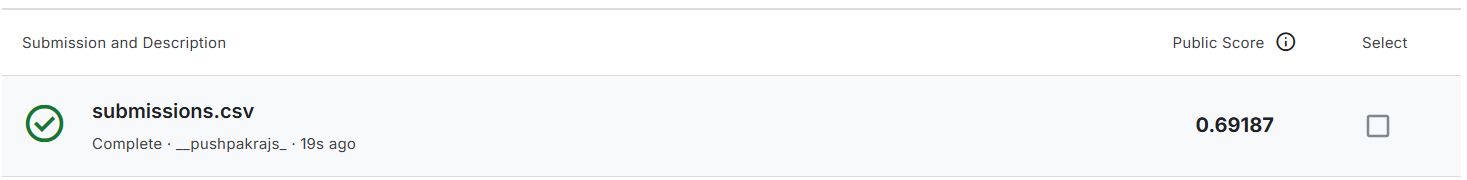